In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [21]:
df = pd.read_csv("Google_Stock_Price_Train.csv")

In [22]:
training_set = df.iloc[:, 1:2].values 

In [23]:
sc = MinMaxScaler(feature_range = (0,1))

In [24]:
train_scaled = sc.fit_transform(training_set)

In [25]:
xtr = []
ytr = []

for i in range(120, 1258):
    xtr.append(train_scaled[i-120:i, 0])
    ytr.append(train_scaled[i, 0])

In [26]:
xtr, ytr = np.array(xtr), np.array(ytr)

In [27]:
xtr = np.reshape(xtr, (xtr.shape[0], xtr.shape[1], 1))

In [28]:
regressor = Sequential()

In [29]:
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (xtr.shape[1], 1)))
regressor.add(Dropout(0.2))

In [30]:
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

In [31]:
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

In [32]:
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

In [33]:
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

In [34]:
regressor.add(Dense(units = 1))

In [35]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [36]:
regressor.fit(xtr, ytr, epochs = 100, batch_size = 32)

Epoch 1/100
36/36 [==============================] - 24s 472ms/step - loss: 0.1249
Epoch 2/100
36/36 [==============================] - 17s 455ms/step - loss: 0.0083
Epoch 3/100
36/36 [==============================] - 19s 533ms/step - loss: 0.0054
Epoch 4/100
36/36 [==============================] - 23s 630ms/step - loss: 0.0038
Epoch 5/100
36/36 [==============================] - 32s 895ms/step - loss: 0.0046
Epoch 6/100
36/36 [==============================] - 23s 651ms/step - loss: 0.0035
Epoch 7/100
36/36 [==============================] - 19s 526ms/step - loss: 0.0038
Epoch 8/100
36/36 [==============================] - 16s 450ms/step - loss: 0.0040
Epoch 9/100
36/36 [==============================] - 18s 501ms/step - loss: 0.0038
Epoch 10/100
36/36 [==============================] - 16s 451ms/step - loss: 0.0042
Epoch 11/100
36/36 [==============================] - 17s 462ms/step - loss: 0.0041
Epoch 12/100
36/36 [==============================] - 16s 431ms/step - loss: 0.0038
E

36/36 [==============================] - 18s 499ms/step - loss: 0.0014
Epoch 99/100
36/36 [==============================] - 18s 505ms/step - loss: 0.0014
Epoch 100/100
36/36 [==============================] - 18s 502ms/step - loss: 0.0015


In [37]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [38]:
dataset_total = pd.concat((df['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

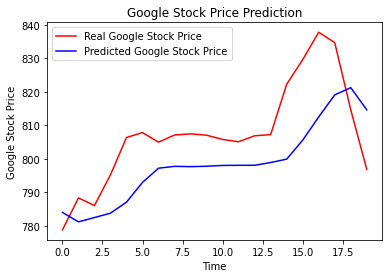

In [39]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()